<a href="https://colab.research.google.com/github/Katerina2626/ML/blob/main/base_line_5_2_posl_ver_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Определение тональности текстов отзывов на сайте [YELP](https://www.yelp.com/dataset) одномерной сверточной нейросетью

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-yelp/sample_submission.csv
/kaggle/input/dl-urfu-yelp/train.csv
/kaggle/input/dl-urfu-yelp/test.csv
/kaggle/input/dl-urfu-yelp/train_label.csv


Загружаем данные

In [ ]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-yelp/'
x_train = pd.read_csv(KAGGLE_PATH + 'train.csv')
y_train = pd.read_csv(KAGGLE_PATH + 'train_label.csv', index_col=0)
x_test = pd.read_csv(KAGGLE_PATH + 'test.csv')
x_train.shape, y_train.shape, x_test.shape,

((560000, 1), (560000, 1), (4000, 1))

## Подготовка данных для обучения

### Токенизация текста

In [ ]:
# извлекаем столбец с текстом
x_train = x_train.Review
x_test = x_test.Review

In [ ]:
# указываем длину словаря, который мы будем использовать
num_words = 10000
# указываем длину последовательности, к которой приведем все тексты
max_review_len = 50
# создаем и обучаем токенизатор на тернировочных данных
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
# применяем токенизатор к тренировочным и тестовым данным
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
# приводим все вектора текстов к общей длине
x_train = pad_sequences(x_train, maxlen=max_review_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_review_len, padding='post')

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 30, input_length=max_review_len))
model.add(Conv1D(64, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=64,
                    validation_split=0.1)

Epoch 1/40
7875/7875 [==============================] - 74s 9ms/step - loss: 0.6917 - accuracy: 0.5265 - val_loss: 0.6660 - val_accuracy: 0.6256
Epoch 2/40
7875/7875 [==============================] - 73s 9ms/step - loss: 0.6305 - accuracy: 0.6536 - val_loss: 0.4333 - val_accuracy: 0.8044
Epoch 3/40
7875/7875 [==============================] - 73s 9ms/step - loss: 0.4220 - accuracy: 0.8065 - val_loss: 0.2887 - val_accuracy: 0.8787
Epoch 4/40
7875/7875 [==============================] - 73s 9ms/step - loss: 0.3204 - accuracy: 0.8620 - val_loss: 0.2478 - val_accuracy: 0.8977
Epoch 5/40
7875/7875 [==============================] - 73s 9ms/step - loss: 0.2864 - accuracy: 0.8800 - val_loss: 0.2269 - val_accuracy: 0.9071
Epoch 6/40
7875/7875 [==============================] - 73s 9ms/step - loss: 0.2641 - accuracy: 0.8910 - val_loss: 0.2173 - val_accuracy: 0.9116
Epoch 7/40
7875/7875 [==============================] - 72s 9ms/step - loss: 0.2489 - accuracy: 0.8980 - val_loss: 0.2059 - val_ac

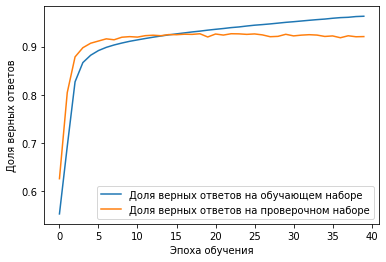

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [ ]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_submission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
